In [19]:
import pandas as pd
import numpy as np
import pickle
import os, sys
import re
import glob

#
import pathmagic
import initialise as init
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

In [2]:
df_acc = pd.read_csv(init.raw_path + "/road_safety_data/dft-road-casualty-statistics-accident-1979-2021.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,15,16,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_cas = pd.read_csv(init.raw_path + "/road_safety_data/dft-road-casualty-statistics-casualty-1979-2021.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_veh = pd.read_csv(init.raw_path + "/road_safety_data/dft-road-casualty-statistics-vehicle-1979-2021.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
list(df_acc.columns)

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [20]:
df_acc.tail()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
8703906,2021991196247,2021,991196247,325546.0,674548.0,-3.194076,55.958152,99,3,2,1,22/09/2021,4,09:05,-1,S12000036,S12000036,6,0,6,20.0,3,4,6,0,0,0,1,1,1,0,0,1,1,-1,-1
8703907,2021991196607,2021,991196607,271195.0,558271.0,-4.010304,54.902512,99,3,2,2,11/09/2021,7,21:15,-1,S12000006,S12000006,3,711,6,60.0,0,-1,0,-1,0,0,6,1,1,0,0,2,1,-1,-1
8703908,2021991197944,2021,991197944,357297.0,860768.0,-2.716825,57.634805,99,3,1,1,17/04/2021,7,14:30,-1,S12000034,S12000034,4,9022,6,60.0,9,3,6,0,0,0,1,1,1,0,0,2,1,-1,-1
8703909,2021991200639,2021,991200639,326936.0,675925.0,-3.172192,55.970735,99,3,1,1,17/09/2021,6,17:00,-1,S12000036,S12000036,3,901,9,20.0,3,2,3,901,0,5,1,9,1,0,0,1,2,-1,-1
8703910,2021991201030,2021,991201030,270574.0,556367.0,-4.019126,54.885252,99,3,2,1,15/10/2021,6,16:15,-1,S12000006,S12000006,3,711,6,60.0,0,-1,0,-1,0,0,1,1,1,4,0,2,1,-1,-1


In [54]:
df_acc_2016 = df_acc[df_acc['accident_year'] >= 2021]

In [74]:
df_acc_2016.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,101087.0,101070.000000,1.010700e+05,101070.000000,101070.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000,101087.000000
mean,2021.0,455370.590195,2.742674e+05,-1.204951,52.355819,27.055833,2.760286,1.844382,1.268304,4.138692,-0.351756,4.204725,789.634899,5.256769,36.003146,4.385757,1.771385,3.087697,223.660847,0.362064,1.167648,1.976822,1.651419,1.346612,0.253128,0.196623,1.319695,1.450533,1.721547
std,0.0,92901.603757,1.450539e+05,1.357913,1.307057,24.235890,0.459800,0.680355,0.674544,1.941061,15.603753,1.464199,1583.067339,1.701544,14.121083,13.915899,2.528051,2.751656,931.658373,1.717190,2.420433,1.685636,1.848077,0.957330,1.345088,1.209476,0.466721,0.729211,0.792752
min,2021.0,67564.000000,1.389800e+04,-7.486852,49.980835,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000
25%,2021.0,392252.500000,1.751752e+05,-2.116694,51.462397,4.000000,3.000000,1.000000,1.000000,2.000000,-1.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2021.0,461832.500000,2.116415e+05,-1.087226,51.789613,21.000000,3.000000,2.000000,1.000000,4.000000,-1.000000,4.000000,34.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2021.0,530038.000000,3.823895e+05,-0.127483,53.334320,44.000000,3.000000,2.000000,1.000000,6.000000,-1.000000,6.000000,532.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2021.0,655140.000000,1.179892e+06,1.755955,60.500008,99.000000,3.000000,13.000000,22.000000,7.000000,480.000000,6.000000,9480.000000,9.000000,70.000000,99.000000,9.000000,6.000000,9176.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


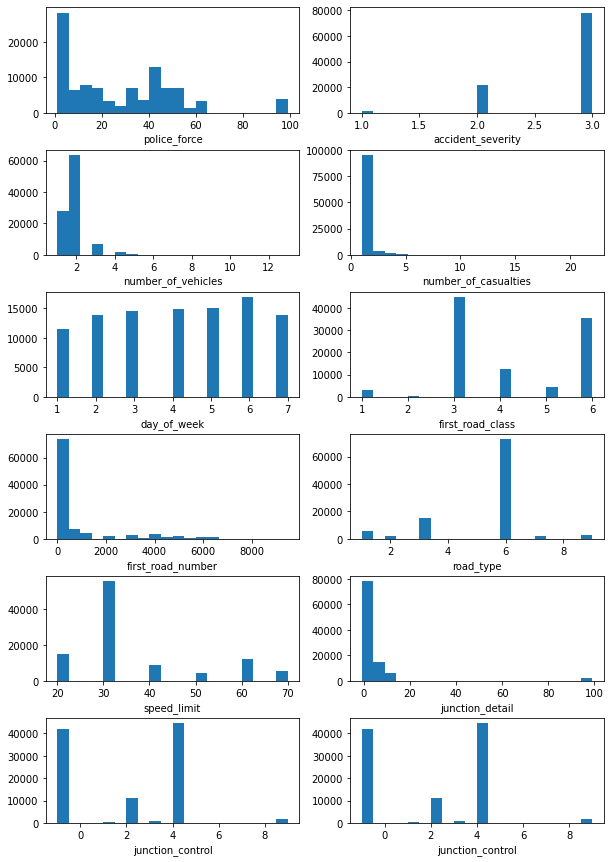

In [72]:
cols_to_plot = ['police_force',
'accident_severity',
'number_of_vehicles',
 'number_of_casualties',
#  'date', # change to datetime
 'day_of_week',
#  'time', # change to datetime
#  'local_authority_district',
#  'local_authority_ons_district',
#  'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control']


# sns.distplot(df_acc_2016['number_of_vehicles'], kde = False)

fig, axes  = plt.subplots(nrows = int(np.ceil(len(cols_to_plot)/2)), ncols = 2, figsize = (10,15), )

plt.subplots_adjust(hspace = 0.35)
# fig.set_figheight(150)
# fig.set_figwidth(150)

if len(cols_to_plot) % 2 != 0:
    cols_to_plot.append(cols_to_plot[-1])
    
axes 
for col, ax in zip(cols_to_plot, [ax for sublist in axes for ax in sublist]):
    ax.hist(df_acc_2016[col], bins = 20)
    ax.set_xlabel(col)


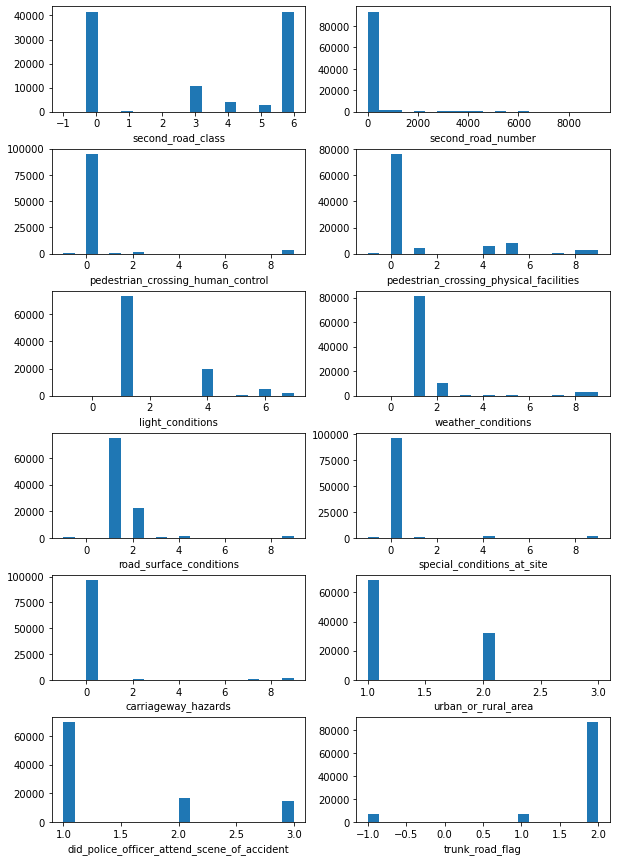

In [73]:
cols_to_plot = ['second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag']


# sns.distplot(df_acc_2016['number_of_vehicles'], kde = False)

fig, axes  = plt.subplots(nrows = int(np.ceil(len(cols_to_plot)/2)), ncols = 2, figsize = (10,15))
plt.subplots_adjust(hspace = 0.35)
# fig.set_figheight(150)
# fig.set_figwidth(150)

if len(cols_to_plot) % 2 != 0:
    cols_to_plot.append(cols_to_plot[-1])
    
axes 
for col, ax in zip(cols_to_plot, [ax for sublist in axes for ax in sublist]):
    ax.hist(df_acc_2016[col], bins = 20)
    ax.set_xlabel(col)



In [ ]:
df_acc_cas = df_acc.merge(df_cas, on = 'accident_index')

df_acc_cas[['casualty_severity','accident_severity']].corr()

In [ ]:
df_acc_cas.groupby('accident_severity')['casualty_severity'].mean()

* 0.83 correlation between cas and acc severity
* if acc sev is 3 then cas sev is always three

* Therefore best to remove cas_sev

In [77]:
df_acc.groupby('accident_severity')['casualty_severity'].mean()

KeyError: 'Column not found: casualty_severity'

In [78]:
x = df_acc.merge(df_cas, on = 'accident_index')

In [79]:
x.groupby('accident_severity')['casualty_severity'].mean()

accident_severity
1    1.688093
2    2.240959
3    3.000000
Name: casualty_severity, dtype: float64

In [90]:
x.groupby('casualty_severity')['accident_severity'].mean()

casualty_severity
1    1.000000
2    1.968921
3    2.926629
Name: accident_severity, dtype: float64

,casualty_severity,accident_severity
casualty_severity,1.000000,0.832481
accident_severity,0.832481,1.000000


In [81]:
x['number_of_casualties'].value_counts(dropna = False)

1     6682874
2     2580278
3     1065360
4      542376
5      243830
       ...   
71         71
68         68
67         67
59         59
58         58
Name: number_of_casualties, Length: 73, dtype: int64

In [89]:
df_acc[df_acc['number_of_casualties'] <= 1]['number_of_casualties'].value_counts()

1    6809672
Name: number_of_casualties, dtype: int64

In [92]:
df_acc.corr()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
accident_year,1.000000,0.104169,-0.043059,0.052039,-0.041236,-0.007575,0.091040,0.073416,0.014631,-0.015758,-0.024180,-0.002420,0.004084,-0.129388,-0.003732,0.024414,-0.003293,0.023149,0.023360,0.143652,0.116703,-0.019013,-0.083482,-0.038024,0.065310,0.008321,0.790631,0.824513,0.731454
location_easting_osgr,0.104169,1.000000,-0.326377,0.999369,-0.428210,-0.375402,0.028888,0.042181,-0.027318,-0.006469,-0.358209,-0.042457,-0.115242,-0.029813,-0.032571,0.037699,0.050399,0.061167,-0.033629,0.081553,0.069540,-0.000215,-0.083434,-0.051412,0.034750,-0.004453,0.054477,0.069696,0.239779
location_northing_osgr,-0.043059,-0.326377,1.000000,-0.436661,0.999973,0.105243,-0.024811,-0.044882,0.025596,0.003404,0.046787,0.029129,0.063459,0.030076,0.019151,-0.025434,-0.026026,-0.043872,0.027677,-0.073094,-0.035980,0.006681,0.073682,0.056432,-0.037193,-0.003759,-0.010910,-0.024920,-0.177318
longitude,0.052039,0.999369,-0.436661,1.000000,-0.438567,-0.379012,0.014392,0.019454,-0.039281,-0.001751,-0.390556,-0.051605,-0.137234,-0.013646,-0.066350,0.048090,0.057374,0.040744,-0.053199,0.055820,0.074293,0.014973,-0.017375,-0.049134,0.013040,0.013620,-0.097244,0.034151,0.533790
latitude,-0.041236,-0.428210,0.999973,-0.438567,1.000000,0.173781,-0.033413,-0.036172,0.034745,0.002802,0.129264,0.035345,0.068702,0.010519,0.049379,-0.034429,-0.037476,-0.023644,0.037693,-0.040218,-0.025789,0.002458,0.009372,0.058398,-0.007651,-0.009888,0.049586,-0.008219,-0.448818
police_force,-0.007575,-0.375402,0.105243,-0.379012,0.173781,1.000000,-0.064098,-0.008528,0.027840,0.003627,0.963826,0.043095,-0.019054,-0.027209,0.198184,-0.096861,-0.112751,-0.085367,-0.042650,0.001189,-0.066892,0.024767,-0.026259,0.057733,0.026820,0.015325,0.049624,-0.002551,-0.254042
accident_severity,0.091040,0.028888,-0.024811,0.014392,-0.033413,-0.064098,1.000000,0.073236,-0.135349,-0.001661,-0.059546,0.019284,-0.005933,-0.023420,-0.099257,0.046411,0.078524,0.069857,0.026309,0.011430,0.021792,-0.077789,0.015363,0.001577,0.004916,0.001868,0.076994,0.094890,0.098636
number_of_vehicles,0.073416,0.042181,-0.044882,0.019454,-0.036172,-0.008528,0.073236,1.000000,0.206466,-0.008492,0.000172,-0.127375,-0.000871,-0.087028,0.100900,0.058134,0.081729,0.075317,0.018004,-0.003451,-0.048765,-0.075519,-0.006749,-0.008770,0.007614,-0.043497,0.081766,0.052557,0.065960
number_of_casualties,0.014631,-0.027318,0.025596,-0.039281,0.034745,0.027840,-0.135349,0.206466,1.000000,-0.003912,0.034268,-0.082034,0.014746,-0.027483,0.165183,-0.015229,-0.044411,-0.039746,0.006491,-0.008369,-0.031813,0.054634,-0.004893,0.035040,0.010133,-0.004416,0.052156,-0.003182,0.010657
day_of_week,-0.015758,-0.006469,0.003404,-0.001751,0.002802,0.003627,-0.001661,-0.008492,-0.003912,1.000000,0.003161,0.005087,0.002659,0.011159,-0.017888,0.002752,0.002640,0.004473,-0.002500,-0.000613,0.006363,0.011139,-0.000583,-0.002300,-0.004308,-0.003576,-0.017176,-0.013071,-0.012283


In [ ]:
# vehicle_types that are insured motor drivers (cars and motorbikes)
1,2,3,4,5,8,9,10,11,17,19,20,21,23,97,98

# veh types that not insured motor drivers
16,18,22,90,99


In [93]:
# df_acc feature engineering

In [ ]:
df_acc[]

In [236]:
class Accident_feature_engineering():

    def __init__(self, df):
        
        self.df = df
        
        
    def transform(self):
        
        drop_list = []
#         vehicle_collision_flag
        self.df['vehicle_collision_flag'] = np.where(self.df['number_of_vehicles'] > 1, 1, 0)
        self.df['vehicle_collision_flag'] = self.df['vehicle_collision_flag'].astype(int).astype(str)
        
        
        self.df['number_of_vehicles'] = self.df['number_of_vehicles'].astype(int)
        
        self.df['number_of_casualties'] = self.df['number_of_casualties'].astype(int)
        
        self.df['day_of_week'] = self.df['day_of_week'].astype(int).astype(str)
        
        self.df['weekend_flag'] = self.df['day_of_week'].map({'1':1,'7':7,'2':0,'3':0,'4':0,'5':0,'6':0})
        self.df['weekend_flag'] = self.df['weekend_flag'].astype(int).astype(str)
        
        
        self.df['hour'] = self.df['time'].str[0:2].astype(int)
        
#         self.df['rushour_flag'] = np.where(self.df['hour'] in [8,17,18], 
#                                            np.where(self.df['weekend_flag'] == 1, 1, 0),
#                                            0)
        
        self.df['rushour_flag'] = 0
        self.df.loc[self.df['hour'].isin([8,17,18]) & self.df['weekend_flag'] == 0,
                    'rushour_flag'] = 1
        self.df['rushour_flag'] = self.df['rushour_flag'].astype(int)
                    
        self.df['unsociable_hour_flag'] = 0
        self.df.loc[self.df['hour'].isin([0,1,2,3]),
                    'unsociable_hour_flag'] = 1
        self.df['unsociable_hour_flag'] = self.df['unsociable_hour_flag'].astype(int)
        
        drop_list.append('time')
        
        self.df['first_road_class'] = self.df['first_road_class'].astype(int)
        
        drop_list.append('first_road_number')
        
        self.df.loc[self.df['road_type'] == 9,
                    'road_type'] = -1
        self.df['road_type'] = self.df['road_type'].astype(str)
        
        self.df['speed_limit'] = self.df['speed_limit'].astype(int)
        self.df.loc[self.df['speed_limit'].isin([-1,99]),
                    'speed_limit'] = np.nan
        
        self.df['junction_detail'] = self.df['junction_detail'].astype(int)
        self.df['junction_detail_grouped'] = self.df['junction_detail'].map({0:0, 
                                                                     1:1, 2:1,
                                                                     3:2,6:2,7:2,8:2,
                                                                     5:3,
                                                                     9:4,
                                                                     99:-1, -1:-1}).astype(str)


        drop_list.append('junction_detail')
        
        self.df.loc[self.df['junction_control'] == 9,
                    'junction_control'] = -1
        self.df['junction_control'] = self.df['junction_control'].astype(str)
        
        
        self.df['second_road_class'] = self.df['second_road_class'].astype(int)
        
        drop_list.append('second_road_number')

        self.df['pedestrian_crossing_human_control_grouped'] = self.df['pedestrian_crossing_human_control'].map({0:0, 
                                                                     1:1, 2:1,
                                                                     99:-1, -1:-1}).astype(str)
        
        self.df.loc[self.df['pedestrian_crossing_physical_facilities'] == 9,
                    'pedestrian_crossing_physical_facilities'] = -1
        
        self.df['light_conditions'] = self.df['light_conditions'].astype(int)
        self.df.loc[self.df['light_conditions'].isin([7,-1]),
                    'light_conditions'] = np.nan
        
        self.df.loc[self.df['weather_conditions'] == 9,
                    'weather_conditions'] = -1
        self.df['weather_conditions'] = self.df['weather_conditions'].astype(str)
        
        self.df.loc[self.df['road_surface_conditions'] == 9,
                    'road_surface_conditions'] = -1
        self.df['road_surface_conditions'] = self.df['road_surface_conditions'].astype(str)
        
        self.df.loc[self.df['special_conditions_at_site'] == 9,
                    'special_conditions_at_site'] = -1
        self.df['special_conditions_at_site'] = self.df['special_conditions_at_site'].astype(str)
        
        
        self.df['carriageway_hazards'] = self.df['carriageway_hazards'].astype(int)
        self.df['carriageway_hazards_grouped'] = self.df['carriageway_hazards'].map({0:0,
                                                                                     1:1, 
                                                                                     2:2,
                                                                                     3:3,
                                                                                     4:4,5:4,7:4,
                                                                                     6:6,
                                                                                     9:-1, -1:-1}).astype(str)

        self.df.loc[self.df['urban_or_rural_area'] == 3,
                    'urban_or_rural_area'] = -1
        self.df['urban_or_rural_area'] = self.df['urban_or_rural_area'].astype(str)
        
        self.df['did_police_officer_attend_scene_of_accident'] = self.df['did_police_officer_attend_scene_of_accident'].astype(str)

        self.df['trunk_road_flag'] = self.df['trunk_road_flag'].astype(str)

In [237]:
df_acc_test = df_acc[0:10].copy()

In [238]:
df_transformer = Accident_feature_engineering(df_acc_test)
df_transformer.transform()

In [239]:
df_transformer.df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_collision_flag,weekend_flag,hour,rushour_flag,unsociable_hour_flag,junction_detail_grouped,pedestrian_crossing_human_control_grouped,carriageway_hazards_grouped
0,197901A11AD14,1979,01A11AD14,NaN,NaN,NaN,NaN,1,3,2,1,18/01/1979,5,08:00,11,-1,-1,3,4,1,30.0,1,4,-1,-1,-1,-1,1.0,8,1,-1,0,-1,-1,-1,-1,1,0,8,0,0,1,-1,0
1,197901A1BAW34,1979,01A1BAW34,198460.0,894000.0,NaN,NaN,1,3,1,1,01/01/1979,2,01:00,23,-1,-1,6,0,-1,30.0,3,4,-1,-1,-1,-1,4.0,8,3,-1,0,-1,-1,-1,-1,0,0,1,1,1,2,-1,0
2,197901A1BFD77,1979,01A1BFD77,406380.0,307000.0,NaN,NaN,1,3,2,3,01/01/1979,2,01:25,17,-1,-1,3,112,-1,30.0,6,4,-1,-1,-1,-1,4.0,8,3,-1,0,-1,-1,-1,-1,1,0,1,1,1,2,-1,0
3,197901A1BGC20,1979,01A1BGC20,281680.0,440000.0,NaN,NaN,1,3,2,2,01/01/1979,2,01:30,2,-1,-1,3,502,12,30.0,3,2,-1,-1,-1,-1,4.0,8,3,-1,0,-1,-1,-1,-1,1,0,1,1,1,2,-1,0
4,197901A1BGF95,1979,01A1BGF95,153960.0,795000.0,NaN,NaN,1,2,2,1,01/01/1979,2,01:30,510,-1,-1,3,309,6,30.0,0,-1,-1,-1,-1,-1,4.0,3,3,-1,0,-1,-1,-1,-1,1,0,1,1,1,0,-1,0
5,197901A1CBC96,1979,01A1CBC96,300370.0,146000.0,NaN,NaN,1,3,1,1,01/01/1979,2,02:05,9,-1,-1,3,23,6,30.0,3,2,-1,-1,-1,-1,4.0,8,3,-1,0,-1,-1,-1,-1,0,0,2,1,1,2,-1,0
6,197901A1DAK71,1979,01A1DAK71,143370.0,951000.0,NaN,NaN,1,3,2,2,01/01/1979,2,03:00,27,-1,-1,4,454,-1,30.0,0,-1,-1,-1,-1,-1,4.0,8,3,-1,0,-1,-1,-1,-1,1,0,3,1,1,0,-1,0
7,197901A1DAP95,1979,01A1DAP95,471960.0,845000.0,NaN,NaN,1,3,2,1,01/01/1979,2,03:00,19,-1,-1,5,0,-1,30.0,3,4,-1,-1,-1,-1,4.0,8,3,-1,0,-1,-1,-1,-1,1,0,3,1,1,2,-1,0
8,197901A1EAC32,1979,01A1EAC32,323880.0,632000.0,NaN,NaN,1,2,1,1,01/01/1979,2,04:00,3,-1,-1,3,105,6,30.0,3,4,-1,-1,-1,-1,4.0,3,3,-1,0,-1,-1,-1,-1,0,0,4,1,0,2,-1,0
9,197901A1FBK75,1979,01A1FBK75,136380.0,245000.0,NaN,NaN,1,3,2,1,01/01/1979,2,05:05,27,-1,-1,4,455,-1,30.0,0,-1,-1,-1,-1,-1,4.0,8,3,-1,0,-1,-1,-1,-1,1,0,5,1,0,0,-1,0
